In [1]:
import pandas as pd  
import numpy as np  
from numpy import median
from numpy import mean

import os
for dirname, _, filenames in os.walk('/Users/tavsiev/Desktop/projet_kaggle/projet/classification-multi-classes'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, classification_report 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
# https://www.kaggle.com/code/wlwwwlw/survival-analysis-of-cirrhosis-patients-feature

/Users/tavsiev/Desktop/projet_kaggle/projet/classification-multi-classes/test.csv
/Users/tavsiev/Desktop/projet_kaggle/projet/classification-multi-classes/train.csv
/Users/tavsiev/Desktop/projet_kaggle/projet/classification-multi-classes/sample_submission.csv


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/tavsiev/Desktop/projet_kaggle/.venv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <33C992FB-C1EB-390D-846C-E9915F53FAB8> /Users/tavsiev/Desktop/projet_kaggle/.venv/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file)"]


In [ ]:
train = pd.read_csv("/Users/tavsiev/Desktop/projet_kaggle/projet/classification-multi-classes/train.csv", 
                      delimiter = ",",
                      header = 0)

test = pd.read_csv("/Users/tavsiev/Desktop/projet_kaggle/projet/classification-multi-classes/test.csv", 
                      delimiter = ",",
                      header = 0)

train.shape, test.shape # manque la colonne Status

((15000, 20), (10000, 19))

In [ ]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8564 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8563 non-null   object 
 6   Hepatomegaly   8564 non-null   object 
 7   Spiders        8555 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6669 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8452 non-null   float64
 13  Alk_Phos       8558 non-null   float64
 14  SGOT           8555 non-null   float64
 15  Tryglicerides  6630 non-null   float64
 16  Platelets      14414 non-null  float64
 17  Prothrombin    14974 non-null  float64
 18  Stage 

In [ ]:
# drop the id column since it does not make any changes to the result
#train = train.drop('id', axis = 1)
#test = test.drop('id', axis = 1)

In [ ]:
# check if there have NAs
train.isna().sum().any(),  test.isna().sum().any()

(np.True_, np.True_)

In [ ]:
# check for duplicates
total = pd.concat([train.drop('Status', axis=1), test], axis = 0)
total.duplicated().sum()

np.int64(0)

In [ ]:
total.duplicated().value_counts()

False    25000
Name: count, dtype: int64

In [ ]:
# checking for dupliactes columns or rows
train[train.duplicated()]
# check for duplicate rows 
duplicate_rows = train[train.duplicated()]

# display the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [ ]:
# check for numbers of unique values in each columns
train[train.columns].nunique().sort_values(ascending=True)

Drug                 2
Sex                  2
Spiders              2
Hepatomegaly         3
Edema                3
Status               3
Stage                4
Ascites              4
Prothrombin         54
Bilirubin          118
Tryglicerides      153
Albumin            165
Copper             170
SGOT               201
Cholesterol        210
Platelets          267
Age                375
Alk_Phos           387
N_Days             543
id               15000
dtype: int64

In [ ]:
# Hepatomegaly has three value, let's take a look at it
# valeur numérique est une erreur donc supprimer
train.Hepatomegaly.value_counts()

Hepatomegaly
N         4564
Y         3999
119.35       1
Name: count, dtype: int64

In [ ]:
# Edema has three value, let's take a look at it
train.Edema.value_counts()

Edema
N    13823
S      811
Y      366
Name: count, dtype: int64

After investigation, those values are
- N: No
- Y: Yes
- S: Slight

In [ ]:
# take a look at the Drug column
train.Drug.value_counts()

Drug
D-penicillamine    4568
Placebo            3996
Name: count, dtype: int64

In [ ]:
# check for target data
train.Status.value_counts()

Status
C     10049
D      4560
CL      391
Name: count, dtype: int64

In [ ]:
# il faut supprimer S et D-penicillamine
train.Ascites.value_counts()

Ascites
N                  8178
Y                   383
S                     1
D-penicillamine       1
Name: count, dtype: int64

In [ ]:
# % de valeurs manquantes
train.isna().sum()/len(train)*100

id                0.000000
N_Days            0.000000
Drug             42.906667
Age               0.000000
Sex               0.000000
Ascites          42.913333
Hepatomegaly     42.906667
Spiders          42.966667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.540000
Albumin           0.000000
Copper           43.653333
Alk_Phos         42.946667
SGOT             42.966667
Tryglicerides    55.800000
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
Status            0.000000
dtype: float64

In [ ]:
train = train[~train['Ascites'].isin(['D-penicillamine', 'S'])]
train = train[train['Hepatomegaly'] != '119.35']

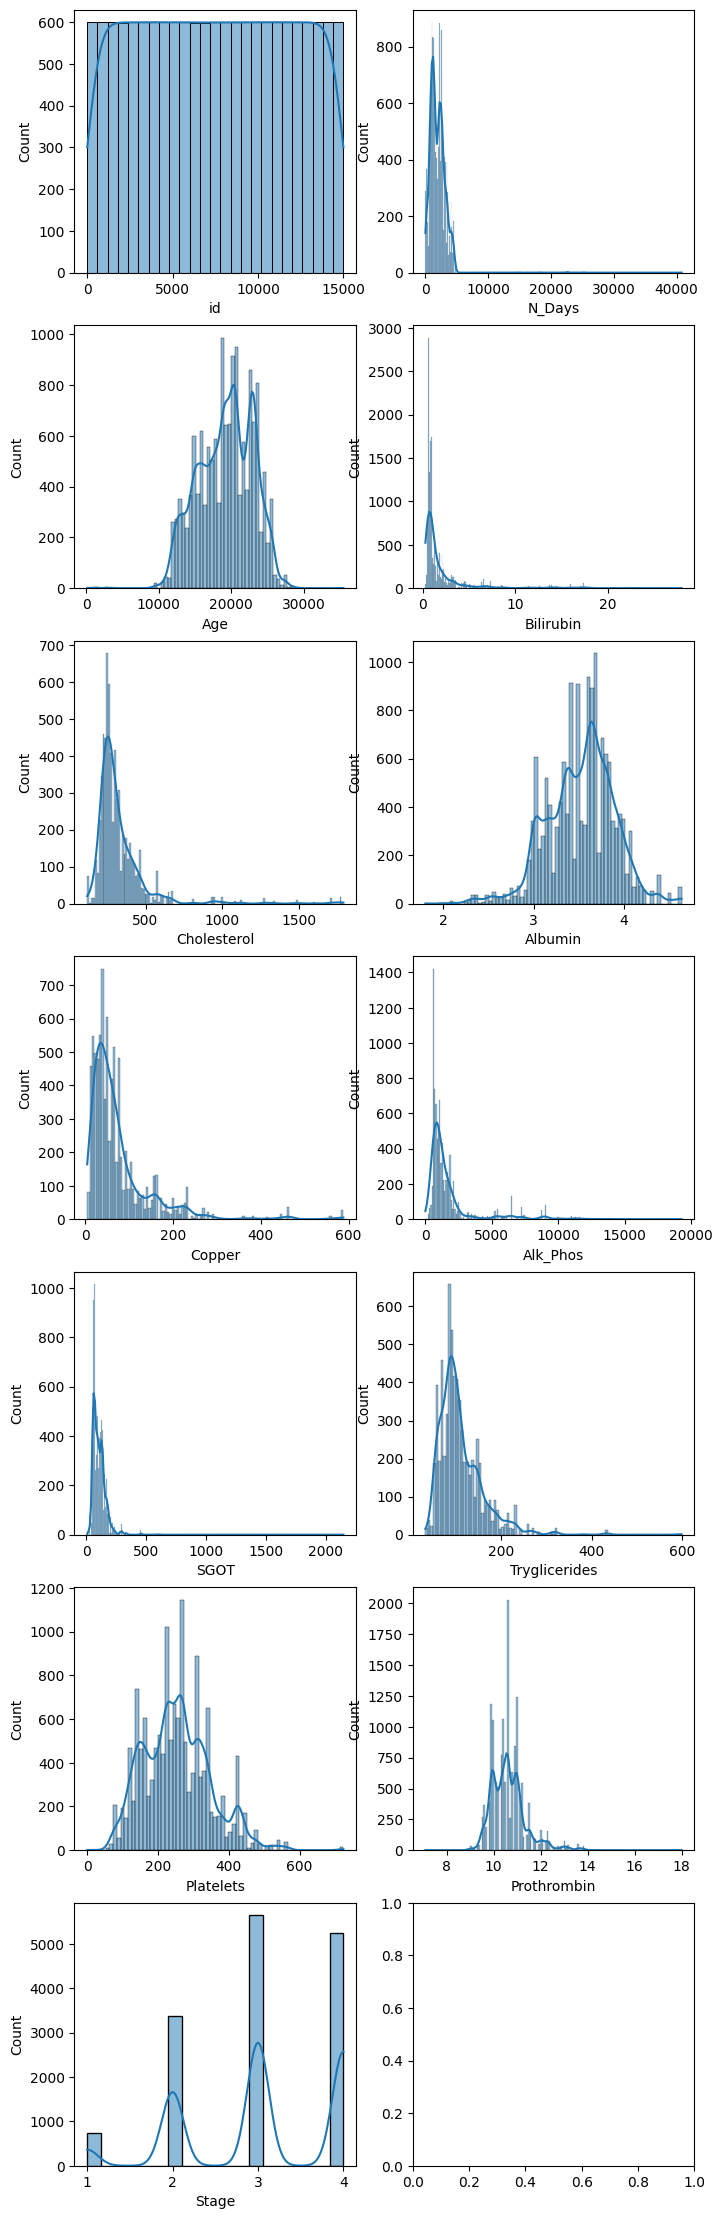

In [ ]:
# plot the numerical data
rows = (len(train.select_dtypes(include = ['int', 'float']).columns)+1)//2
_, axes = plt.subplots(rows, 2, figsize = (8, rows*4))
for i, col in enumerate(train.select_dtypes(include = ['int', 'float']).columns):
    hor = i%2
    ver = i//2
    sns.histplot(data = train.select_dtypes(include = ['int', 'float'])[col], kde = True, ax = axes[ver, hor])

In [ ]:
train_eng = train.copy()
# test_eng = test.copy() 
cible = train_eng[['id', 'Status']] 
train_eng = train_eng.drop(['id', 'Status'], axis=1) 

In [ ]:
num_train = train_eng.select_dtypes(include = ['int', 'float'])
num_train.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1055.0,19724.0,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0
1,3282.0,17884.0,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0
2,1653.0,20600.0,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0
3,999.0,22514.0,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0
4,2202.0,17897.0,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0


In [ ]:
cat_train = train_eng.select_dtypes(include = ['object']).astype('category')
cat_train.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,NaN,F,NaN,NaN,NaN,N
1,Placebo,F,N,Y,Y,N
2,NaN,F,NaN,NaN,NaN,N
3,D-penicillamine,F,N,Y,N,N
4,NaN,F,NaN,NaN,NaN,N


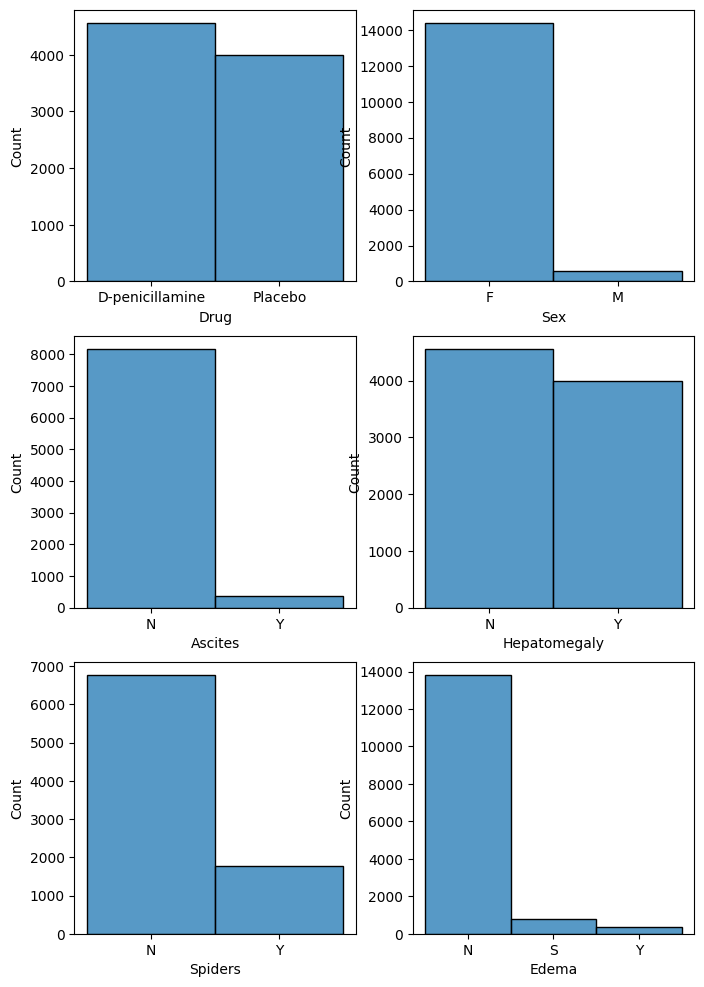

In [ ]:
# plot the categorical data after correction
rows = (len(cat_train.columns)+1)//2
_, axes = plt.subplots(rows, 2, figsize = (8, rows*4))
for i, col in enumerate(cat_train.columns):
    hor = i%2
    ver = i//2
    sns.histplot(data = cat_train[col], ax = axes[ver, hor])

In [ ]:
num_train.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,14997.0,1967.132093,1355.859096,3.0,1092.00,1785.00,2635.00,40795.00
Age,14997.0,19248.023245,3697.745235,133.3,16374.00,19544.00,22369.00,35472.00
Bilirubin,14997.0,1.860394,2.749668,0.3,0.60,0.90,1.80,28.00
Cholesterol,6667.0,327.671516,179.826402,120.0,242.00,280.00,360.00,1790.00
Albumin,14997.0,3.525388,0.369876,1.8,3.29,3.58,3.77,4.64
Copper,8449.0,74.695349,74.197324,4.0,31.00,52.00,86.00,588.00
Alk_Phos,8555.0,1667.185365,1861.330184,16.0,721.00,1072.00,1690.50,19270.00
SGOT,8552.0,106.577603,56.502752,8.0,71.00,97.65,133.30,2148.00
Tryglicerides,6628.0,110.256903,49.521555,33.0,80.00,99.00,133.00,598.00
Platelets,14411.0,253.790070,94.056321,0.4,183.00,251.00,312.00,724.00


In [ ]:
cat_train.describe().T

,count,unique,top,freq
Drug,8561,2,D-penicillamine,4567
Sex,14997,2,F,14400
Ascites,8560,2,N,8178
Hepatomegaly,8561,2,N,4563
Spiders,8552,2,N,6772
Edema,14997,3,N,13822


In [ ]:
# missing values filled using mode values
cat_train['Drug'].fillna('D-penicillamine', inplace=True)
cat_train['Ascites'].fillna('N', inplace=True)
cat_train['Hepatomegaly'].fillna('N', inplace=True)
cat_train['Spiders'].fillna('N', inplace=True)

# missing values filled using mediuan values
num_train['Cholesterol'].fillna(median(num_train['Cholesterol'].dropna()), inplace=True)
num_train['Copper'].fillna(median(num_train['Copper'].dropna()), inplace=True)
num_train['Alk_Phos'].fillna(median(num_train['Alk_Phos'].dropna()), inplace=True)
num_train['SGOT'].fillna(median(num_train['SGOT'].dropna()), inplace=True)
num_train['Tryglicerides'].fillna(median(num_train['Tryglicerides'].dropna()), inplace=True)
num_train['Platelets'].fillna(median(num_train['Platelets'].dropna()), inplace=True)
num_train['Prothrombin'].fillna(median(num_train['Prothrombin'].dropna()), inplace=True)

/var/folders/zc/__4fgnp121vflx6jgwz_rg240000gn/T/ipykernel_1802/822472826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_train['Drug'].fillna('D-penicillamine', inplace=True)
/var/folders/zc/__4fgnp121vflx6jgwz_rg240000gn/T/ipykernel_1802/822472826.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [ ]:
# apply PowerTransformer for a normalized like distribution
#from sklearn.preprocessing import PowerTransformer
#num_train1 = num_train.copy()

#transformer = PowerTransformer(method = 'yeo-johnson')

#num_train1 = transformer.fit_transform(num_train1)

#num_train1 = pd.DataFrame(num_train1, columns = num_train.columns)
#num_train1

In [ ]:
num_train.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,14997.0,1967.132093,1355.859096,3.0,1092.00,1785.00,2635.00,40795.00
Age,14997.0,19248.023245,3697.745235,133.3,16374.00,19544.00,22369.00,35472.00
Bilirubin,14997.0,1.860394,2.749668,0.3,0.60,0.90,1.80,28.00
Cholesterol,14997.0,301.192639,122.212227,120.0,280.00,280.00,280.00,1790.00
Albumin,14997.0,3.525388,0.369876,1.8,3.29,3.58,3.77,4.64
Copper,14997.0,64.786091,56.816274,4.0,48.00,52.00,58.00,588.00
Alk_Phos,14997.0,1411.521958,1436.333366,16.0,983.00,1072.00,1142.00,19270.00
SGOT,14997.0,102.740942,42.895123,8.0,89.90,97.65,104.49,2148.00
Tryglicerides,14997.0,103.975045,33.391721,33.0,99.00,99.00,99.00,598.00
Platelets,14997.0,253.681050,92.201870,0.4,190.00,251.00,311.00,724.00


In [ ]:
cat_train.describe().T

,count,unique,top,freq
Drug,14997,2,D-penicillamine,11003
Sex,14997,2,F,14400
Ascites,14997,2,N,14615
Hepatomegaly,14997,2,N,10999
Spiders,14997,2,N,13217
Edema,14997,3,N,13822


In [ ]:
train_engineered = pd.concat([num_train, cat_train], axis = 1)
train_engineered = pd.concat([train_engineered, cible['Status']], axis = 1)
train_engineered.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,1055.0,19724.0,1.3,280.0,3.64,52.0,1072.0,97.65,99.0,209.0,10.5,3.0,D-penicillamine,F,N,N,N,N,C
1,3282.0,17884.0,0.7,309.0,3.60,96.0,1142.0,71.30,106.0,240.0,12.4,4.0,Placebo,F,N,Y,Y,N,C
2,1653.0,20600.0,2.2,280.0,3.64,52.0,1072.0,97.65,99.0,139.0,9.5,2.0,D-penicillamine,F,N,N,N,N,C
3,999.0,22514.0,1.0,498.0,3.35,89.0,1601.0,164.30,85.0,394.0,9.7,3.0,D-penicillamine,F,N,Y,N,N,C
4,2202.0,17897.0,17.2,280.0,3.15,52.0,1072.0,97.65,99.0,432.0,11.2,3.0,D-penicillamine,F,N,N,N,N,C


In [ ]:
train_engineered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14997 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   N_Days         14997 non-null  float64 
 1   Age            14997 non-null  float64 
 2   Bilirubin      14997 non-null  float64 
 3   Cholesterol    14997 non-null  float64 
 4   Albumin        14997 non-null  float64 
 5   Copper         14997 non-null  float64 
 6   Alk_Phos       14997 non-null  float64 
 7   SGOT           14997 non-null  float64 
 8   Tryglicerides  14997 non-null  float64 
 9   Platelets      14997 non-null  float64 
 10  Prothrombin    14997 non-null  float64 
 11  Stage          14997 non-null  float64 
 12  Drug           14997 non-null  category
 13  Sex            14997 non-null  category
 14  Ascites        14997 non-null  category
 15  Hepatomegaly   14997 non-null  category
 16  Spiders        14997 non-null  category
 17  Edema          14997 non-null  categ

In [ ]:
cat_col = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# One-Hot Encodaging pour les colonnes catégorielles
train_df_encoded = pd.get_dummies(train_engineered, columns=cat_col, drop_first=True)
train_df_encoded['Status'] = train_df_encoded['Status'].map({'C': 0, 'CL': 1, 'D': 2})

In [ ]:
train_df_encoded.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,1055.0,19724.0,1.3,280.0,3.64,52.0,1072.0,97.65,99.0,209.0,10.5,3.0,0,False,False,False,False,False,False,False
1,3282.0,17884.0,0.7,309.0,3.60,96.0,1142.0,71.30,106.0,240.0,12.4,4.0,0,True,False,False,True,True,False,False
2,1653.0,20600.0,2.2,280.0,3.64,52.0,1072.0,97.65,99.0,139.0,9.5,2.0,0,False,False,False,False,False,False,False
3,999.0,22514.0,1.0,498.0,3.35,89.0,1601.0,164.30,85.0,394.0,9.7,3.0,0,False,False,False,True,False,False,False
4,2202.0,17897.0,17.2,280.0,3.15,52.0,1072.0,97.65,99.0,432.0,11.2,3.0,0,False,False,False,False,False,False,False


In [ ]:
# % de valeurs manquantes
train_df_encoded.isna().sum()/len(train_df_encoded)*100

N_Days            0.0
Age               0.0
Bilirubin         0.0
Cholesterol       0.0
Albumin           0.0
Copper            0.0
Alk_Phos          0.0
SGOT              0.0
Tryglicerides     0.0
Platelets         0.0
Prothrombin       0.0
Stage             0.0
Status            0.0
Drug_Placebo      0.0
Sex_M             0.0
Ascites_Y         0.0
Hepatomegaly_Y    0.0
Spiders_Y         0.0
Edema_S           0.0
Edema_Y           0.0
dtype: float64

In [ ]:
train_df_encoded = train_df_encoded.dropna()
train_df_encoded['Age'] = train_df_encoded['Age']/365
X = train_df_encoded.drop(['Status'], axis=1) 
y = train_df_encoded['Status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(11997, 19)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

model.fit(X_train, y_train)

/Users/tavsiev/Desktop/projet_kaggle/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


/Users/tavsiev/Desktop/projet_kaggle/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, multi_class='multinomial')

In [ ]:
y_pred_proba = model.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss}")

Log Loss: 0.4905453120331399


In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['C', 'CL', 'D']))

              precision    recall  f1-score   support

           C       0.83      0.92      0.87      1998
          CL       0.43      0.04      0.07        82
           D       0.78      0.65      0.71       920

    accuracy                           0.81      3000
   macro avg       0.68      0.54      0.55      3000
weighted avg       0.80      0.81      0.80      3000



In [ ]:
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
le = LabelEncoder()
for col in categorical_cols:
    if col in train_engineered.columns:
        train_engineered[f'{col}_encoded'] = le.fit_transform(train_engineered[col])

In [ ]:
#преобразование статуса и обработка пропусков
train_engineered['Status'] = (train_engineered['Status'] == 'D').astype(int)
train_engineered['N_Days'] = pd.to_numeric(train_engineered['N_Days'], errors='coerce')
train_engineered = train_engineered.dropna(subset=['N_Days'])

#отбор числовых переменных
numeric_cols = train_engineered.select_dtypes(include=[np.number]).columns
X = train_engineered[numeric_cols].drop(['Status', 'ID'], axis=1, errors='ignore')

#обработка пропущенных значений
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(
    imputer.fit_transform(X),
    columns=X.columns,
    index=X.index
)
X_imputed['Age'] = X_imputed['Age']/365

In [ ]:
X_imputed.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_encoded,Sex_encoded,Ascites_encoded,Hepatomegaly_encoded,Spiders_encoded,Edema_encoded
0,1055.0,54.038356,1.3,280.0,3.64,52.0,1072.0,97.65,99.0,209.0,10.5,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3282.0,48.997260,0.7,309.0,3.60,96.0,1142.0,71.30,106.0,240.0,12.4,4.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1653.0,56.438356,2.2,280.0,3.64,52.0,1072.0,97.65,99.0,139.0,9.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999.0,61.682192,1.0,498.0,3.35,89.0,1601.0,164.30,85.0,394.0,9.7,3.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2202.0,49.032877,17.2,280.0,3.15,52.0,1072.0,97.65,99.0,432.0,11.2,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14997 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                14997 non-null  float64
 1   Age                   14997 non-null  float64
 2   Bilirubin             14997 non-null  float64
 3   Cholesterol           14997 non-null  float64
 4   Albumin               14997 non-null  float64
 5   Copper                14997 non-null  float64
 6   Alk_Phos              14997 non-null  float64
 7   SGOT                  14997 non-null  float64
 8   Tryglicerides         14997 non-null  float64
 9   Platelets             14997 non-null  float64
 10  Prothrombin           14997 non-null  float64
 11  Stage                 14997 non-null  float64
 12  Drug_encoded          14997 non-null  float64
 13  Sex_encoded           14997 non-null  float64
 14  Ascites_encoded       14997 non-null  float64
 15  Hepatomegaly_encoded  14

In [ ]:
#отбор признаков
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_imputed, train_engineered['Status'])

feature_scores = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Важность признаков:")
print(feature_scores)

Важность признаков:
                 Feature        Score
10           Prothrombin  4186.683214
2              Bilirubin  3073.273442
11                 Stage  2614.360114
17         Edema_encoded  1451.354466
5                 Copper  1422.582547
4                Albumin  1305.405968
15  Hepatomegaly_encoded  1134.453778
16       Spiders_encoded  1091.032090
0                 N_Days   985.279910
7                   SGOT   858.007521
14       Ascites_encoded   837.112373
9              Platelets   701.634831
1                    Age   561.168100
6               Alk_Phos   224.225137
3            Cholesterol   223.533760
13           Sex_encoded   159.970608
8          Tryglicerides   140.162130
12          Drug_encoded     0.164980


In [ ]:
significant_features = feature_scores[feature_scores['Score'] > 500]['Feature'].tolist()

In [ ]:
significant_features

['Prothrombin',
 'Bilirubin',
 'Stage',
 'Edema_encoded',
 'Copper',
 'Albumin',
 'Hepatomegaly_encoded',
 'Spiders_encoded',
 'N_Days',
 'SGOT',
 'Ascites_encoded',
 'Platelets',
 'Age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, train_engineered['Status'], test_size=0.2, random_state=42)
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)

logloss1 = log_loss(y_test, y_pred_proba1)
print(f"Log Loss: {logloss1}")

/Users/tavsiev/Desktop/projet_kaggle/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Log Loss: 0.37531434118076595


/Users/tavsiev/Desktop/projet_kaggle/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_imputed[significant_features].head()

,Prothrombin,Bilirubin,Stage,Edema_encoded,Copper,Albumin,Hepatomegaly_encoded,Spiders_encoded,N_Days,SGOT,Ascites_encoded,Platelets,Age
0,10.5,1.3,3.0,0.0,52.0,3.64,0.0,0.0,1055.0,97.65,0.0,209.0,54.038356
1,12.4,0.7,4.0,0.0,96.0,3.60,1.0,1.0,3282.0,71.30,0.0,240.0,48.997260
2,9.5,2.2,2.0,0.0,52.0,3.64,0.0,0.0,1653.0,97.65,0.0,139.0,56.438356
3,9.7,1.0,3.0,0.0,89.0,3.35,1.0,0.0,999.0,164.30,0.0,394.0,61.682192
4,11.2,17.2,3.0,0.0,52.0,3.15,0.0,0.0,2202.0,97.65,0.0,432.0,49.032877


In [ ]:
X_imputed.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Drug_encoded,Sex_encoded,Ascites_encoded,Hepatomegaly_encoded,Spiders_encoded,Edema_encoded
0,1055.0,54.038356,1.3,280.0,3.64,52.0,1072.0,97.65,99.0,209.0,10.5,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3282.0,48.997260,0.7,309.0,3.60,96.0,1142.0,71.30,106.0,240.0,12.4,4.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1653.0,56.438356,2.2,280.0,3.64,52.0,1072.0,97.65,99.0,139.0,9.5,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,999.0,61.682192,1.0,498.0,3.35,89.0,1601.0,164.30,85.0,394.0,9.7,3.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2202.0,49.032877,17.2,280.0,3.15,52.0,1072.0,97.65,99.0,432.0,11.2,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_imputed.shape, X_imputed[significant_features].shape, train_engineered['Status'].shape

((14997, 18), (14997, 13), (14997,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed[significant_features], train_engineered['Status'], test_size=0.2, random_state=42)
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

model1.fit(X_train, y_train)
y_pred_proba1 = model1.predict_proba(X_test)

logloss1 = log_loss(y_test, y_pred_proba1)
print(f"Log Loss: {logloss1}")

/Users/tavsiev/Desktop/projet_kaggle/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Log Loss: 0.3759313489710183


In [ ]:
num_classes = train_engineered['Status'].nunique()  # Assurez-vous que 'Status' contient les classes.

X_train, X_test, y_train, y_test = train_test_split(X_imputed[significant_features], 
                                                    train_engineered['Status'], 
                                                    test_size=0.2, 
                                                    random_state=42)

model2 = XGBClassifier(
    objective='multi:softprob',  
    eval_metric='mlogloss',     
    use_label_encoder=False,    
    n_estimators=100,           
    max_depth=6,                
    learning_rate=0.1,          
    random_state=42,            
    num_class=num_classes     
    
)

model2.fit(X_train, y_train)

y_pred_proba2 = model2.predict_proba(X_test)

logloss2 = log_loss(y_test, y_pred_proba2)
print(f"Log Loss: {logloss2:.4f}")